In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
df = pd.read_csv('/Users/xinqu/Sandbox/CS498 Applied Machine Learning/HW/HW7/yelp_2k.csv')
df = df[['text', 'stars']]
df.head()

,text,stars
0,This car wash sucks. Paid $40 for the Ultimat...,1
1,I was referred to Earnie by friends and since ...,5
2,"The food is okay, but they have the worst serv...",1
3,Opting out from the noise and hustle of Flo's ...,1
4,"Basically, unlimited steak. If you like steak,...",5


In [2]:
df['length'] = df['text'].apply(len)

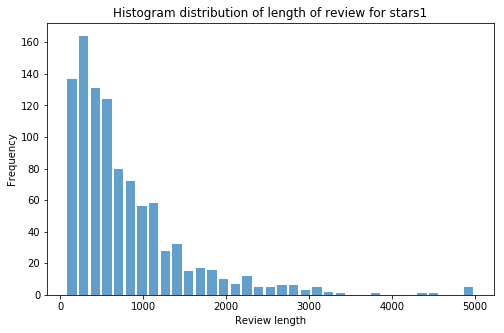

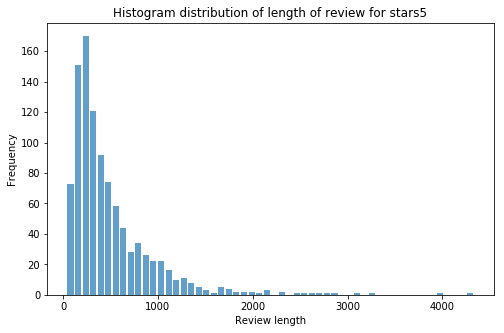

In [3]:
###plot histogram distribution of legnth of review for each class
import matplotlib.pyplot as plt
%matplotlib inline
stars_val = df.stars.unique()
for i in range(len(stars_val)):
    stars = df['length'][df['stars'] == stars_val[i]]
    plt.figure(figsize = (8, 5))
    plt.hist(stars, bins = 'auto', alpha = 0.7, rwidth = 0.8)
    plt.xlabel('Review length')
    plt.ylabel('Frequency')
    plt.title('Histogram distribution of length of review for stars' + str(stars_val[i]))
    plt.show()

In [4]:
###processing and tokenization
import re
stop_words = set(stopwords.words('english'))
def tokenization(text):
    res = []
    words = re.sub('[^a-zA-Z]', ' ', text).lower() ###lower case & remove all punctuations
    words = words.split()
    for word in words:
        if word not in stop_words:
            res.append(word)
    return res

In [5]:
df.iloc[0]['text']

'This car wash sucks.  Paid $40 for the Ultimate VIP.  still had dirt all over the bumpers.  No vacuuming in the hatch. Sales people are very pushy.  Guy kept trying to sell me an oil change & next guy was so pushy about getting a full detail for $155. \n\nMy car is brand new.  RIDICULOUS... worst service ever.'

In [6]:
tokenization(df.iloc[0]['text'])

['car',
 'wash',
 'sucks',
 'paid',
 'ultimate',
 'vip',
 'still',
 'dirt',
 'bumpers',
 'vacuuming',
 'hatch',
 'sales',
 'people',
 'pushy',
 'guy',
 'kept',
 'trying',
 'sell',
 'oil',
 'change',
 'next',
 'guy',
 'pushy',
 'getting',
 'full',
 'detail',
 'car',
 'brand',
 'new',
 'ridiculous',
 'worst',
 'service',
 'ever']

In [7]:
word_list = []
for i in range(2000):
    word_list.append(tokenization(df.iloc[i]['text']))

In [8]:
###bag of words
bag_of_words = set()
for i in range(2000):
    for j in word_list[i]:
        if j not in bag_of_words:
            bag_of_words.add(j)
bag_of_words = sorted(list(bag_of_words))

In [9]:
def BoW(text):
    vector = np.zeros(len(bag_of_words))
    for word in text:
        for i, j in enumerate(bag_of_words):
            if j == word:
                vector[i] += 1
    return vector
#BoW(word_list[0])

In [10]:
BoW(word_list[0])

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
bow_list = []
for i in range(2000):
    bow_list.append(BoW(word_list[i]))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(bow_list, df['stars'], test_size = 0.2, random_state = 42)

LinearSVM classifier

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
classifier = svm.LinearSVC(random_state = 0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
#accuracy_score(predictions, y_test)
print(confusion_matrix(y_test, predictions))

[[188  16]
 [ 14 182]]


In [18]:
accuracy_score(predictions, y_test)

0.925

Text(0.5,1,'Precision-Recall curve for LinearSVM')

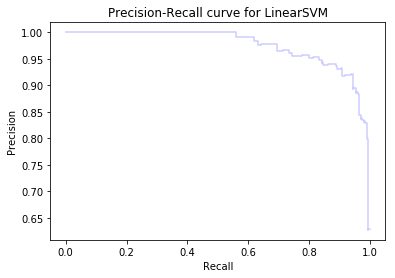

In [20]:
from sklearn.metrics import precision_recall_curve
y_score_rf = classifier.decision_function(X_test) ##predict confidence scores
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_score_rf, pos_label = 5)
plt.step(recall_rf, precision_rf, color = 'b', alpha = 0.2, where = 'post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LinearSVM')

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pre_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pre_logreg))

[[186  18]
 [ 14 182]]


In [22]:
accuracy_score(pre_logreg, y_test)

0.92

Text(0.5,1,'Precision-Recall curve for LogisticRegression')

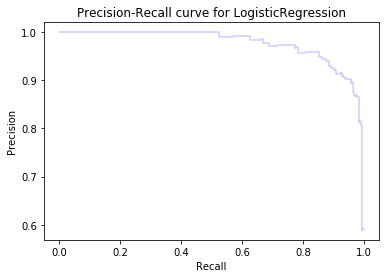

In [24]:
y_score = logreg.decision_function(X_test) ##predict confidence scores
precision, recall, thresholds = precision_recall_curve(y_test, y_score, pos_label = 5)
plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LogisticRegression')